<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [588]:
student_number = '401105742'
Name = 'Ayeen'
Last_Name = 'Poostforoushan' 

# Libraries

In [589]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [590]:
def gaussian_noise(num_samples, noise_std):
    return np.random.normal(0, noise_std, num_samples)

def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    
    y = 0.2*X**6 - 0.5*X**5 + 2*X**4 - 5*X**3 + 3*X**2 - 10*X + 5 + gaussian_noise(num_samples, noise_std)
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

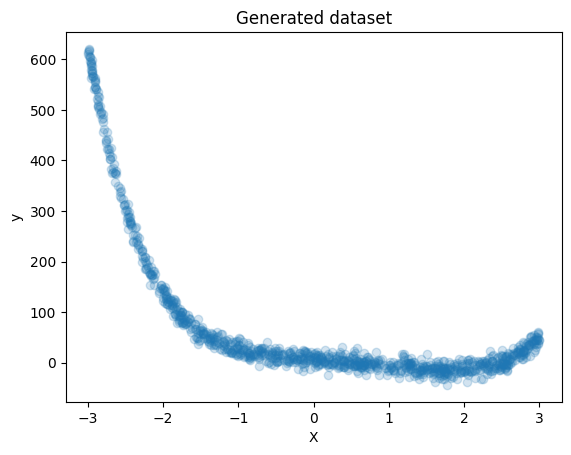

In [591]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.scatter(X, y, alpha=0.2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated dataset')
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [592]:
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, train_size=0.8)

X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, num_samples=y_test_in_range.shape[0])

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

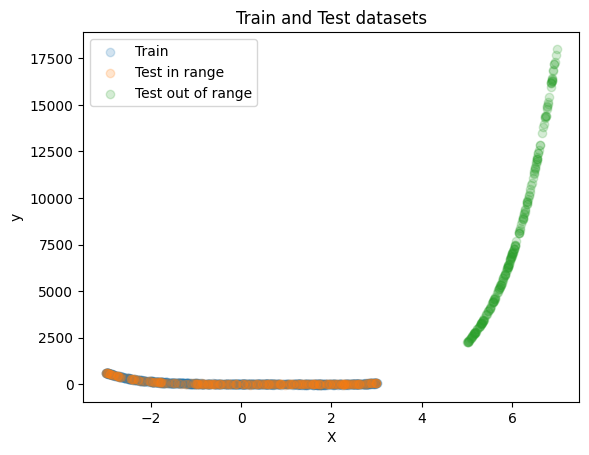

In [593]:
plt.scatter(X_train, y_train, alpha=0.2, label='Train')
plt.scatter(X_test_in_range, y_test_in_range, alpha=0.2, label='Test in range')
plt.scatter(X_test_out_of_range, y_test_out_of_range, alpha=0.2, label='Test out of range')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Train and Test datasets')
plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [594]:
def train_models(X, y, degree):
    pipeline = make_pipeline(PolynomialFeatures(degree),
                             StandardScaler(),
                             LinearRegression())
    
    pipeline.fit(X, y)
    
    return pipeline

In [595]:
models = {}
max_degree = 9

# TODO: Add the trained models with different degrees to the dict
for degree in range(1, max_degree+1):
    models[degree] = train_models(X_train.reshape(-1, 1), y_train, degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [596]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        losses[degree] = mean_squared_error(y_test, y_pred)
    
    return losses

In [597]:
# TODO: Evaluate models on both the train and the test sets.
train_losses = evaluate_models(models, X_train.reshape(-1, 1), y_train)

test_losses_in_range = evaluate_models(models, X_test_in_range.reshape(-1, 1), y_test_in_range)

test_losses_out_of_range = evaluate_models(models, X_test_out_of_range.reshape(-1, 1), y_test_out_of_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

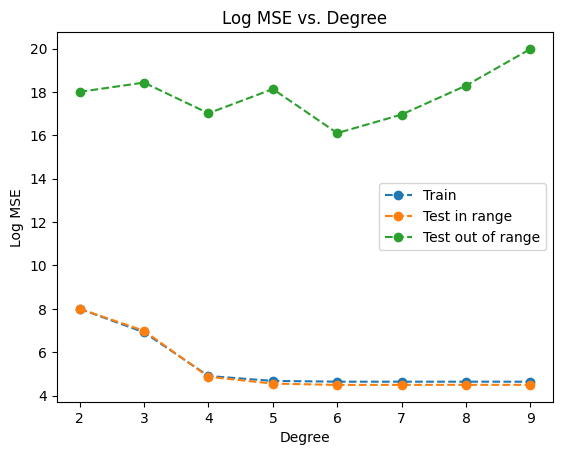

In [598]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_train_losses = np.log([train_losses[degree] for degree in range(2, max_degree+1)])
log_test_losses_in_range = np.log([test_losses_in_range[degree] for degree in range(2, max_degree+1)])
log_test_losses_out_of_range = np.log([test_losses_out_of_range[degree] for degree in range(2, max_degree+1)])

# TODO: Plot the log MSE results
plt.plot(range(2, max_degree+1), log_train_losses, 'o--', label='Train')
plt.plot(range(2, max_degree+1), log_test_losses_in_range, 'o--', label='Test in range')
plt.plot(range(2, max_degree+1), log_test_losses_out_of_range, 'o--', label='Test out of range')
plt.xlabel('Degree')
plt.ylabel('Log MSE')
plt.title('Log MSE vs. Degree')
plt.legend()
plt.show()

In [599]:
dataframe = pd.DataFrame([train_losses, test_losses_in_range, test_losses_out_of_range]).T
dataframe.columns = ['Train', 'Test in range', 'Test out of range']
dataframe

,Train,Test in range,Test out of range
1,10530.127569,11492.007959,8.303100e+07
2,2986.958418,2989.131772,6.628568e+07
3,1009.073334,1081.762135,1.016478e+08
4,134.192298,129.459877,2.465302e+07
5,107.111343,94.568467,7.549304e+07
6,103.316807,88.959525,9.888443e+06
7,103.295371,89.218508,2.327933e+07
8,103.286779,89.273184,8.864586e+07
9,103.263988,89.254148,4.805064e+08


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

<span style="color:cyan;">
**Answer:** I've done the regression on degrees 1 to 9 and I observed that by increasing the degree, the model becomes more complex and the training loss decreases. However, the test loss increases after a certain degree. This is because the model starts to overfit the training data and performs poorly on unseen data. This is a clear example of the bias-variance tradeoff, where increasing the model complexity reduces bias but increases variance.
</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

<span style="color:cyan;">
**Answer:** As the polynomial degree increases, the model becomes more complex and can learn unnecessary details from the training data. We have to adjust the complexity and the degree of freedom of the model based on the amount of data we have, not the complexity of the actual distribution. 
</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [600]:
file_path = "./InsuranceData.csv"

data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [601]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [602]:
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

# encoding
encoder = LabelEncoder()

data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])


# outlier detection (didn't work properly)

# from sklearn.ensemble import IsolationForest
# iso_forest = IsolationForest(contamination=0.5)
# data['is_outlier'] = iso_forest.fit_predict(data[['bmi']])
# data = data[data['is_outlier'] == 1]
# data.head(20)

# scaling
scaler = StandardScaler()
data[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


In [603]:
X = data.drop(columns='charges')
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Training

Fit a linear regressor to the data.

In [604]:
# TODO: Use sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

In [605]:
# TODO: Get the coefficients of the variables and visualize it
coefficients = model.coef_
variables = X.columns

def plot_coefficients(variables, coefficients):
    plt.barh(variables, coefficients)
    plt.xlabel('Coefficient')
    plt.ylabel('Variable')
    plt.title('Variable coefficients')
    plt.show()

# plot_coefficients(variables, coefficients)

print(coefficients)

[ 3586.84765367  -137.299014    2080.60180569   677.20740842
 23855.19511504  -464.38693468]


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [606]:
# TODO: Use Lasso from sklearn library
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train, y_train)

# plot_coefficients(variables, model_lasso.coef_)

print(model_lasso.coef_)

[ 3586.35538118  -134.97068296  2080.04485864   676.69530316
 23851.87993218  -463.87882173]


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [607]:
# TODO: Use Ridge from sklearn library
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train, y_train)

# plot_coefficients(variables, model.coef_)

print(model_ridge.coef_)

[ 3583.83881128  -131.46468317  2080.2256439    677.05807248
 23787.81051662  -463.92830946]


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [608]:
# TODO: Use folding methods and mape from sklearn library

normal_pred = model.predict(X_test)
normal_mape = mean_absolute_percentage_error(y_test, normal_pred)

print(f'Normal MAPE: {normal_mape}')

lasso_pred = model_lasso.predict(X_test)
lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)

print(f'Lasso MAPE: {lasso_mape}')

ridge_pred = model_ridge.predict(X_test)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)

print(f'Ridge MAPE: {ridge_mape}')

Normal MAPE: 0.4681281922244429
Lasso MAPE: 0.4681646727454699
Ridge MAPE: 0.46916784918441695


Add extra variables to dataset to make model more complex, then compare the results. 

In [609]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 
degree = 2
pipeline = make_pipeline(PolynomialFeatures(degree),
                         LinearRegression())
pipeline.fit(X_train, y_train)


pipeline_lasso = make_pipeline(PolynomialFeatures(degree),
                               Lasso(alpha=1))
pipeline_lasso.fit(X_train, y_train)


pipeline_ridge = make_pipeline(PolynomialFeatures(degree),
                               Ridge(alpha=1))
pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])

Report your best model with its evaluated results.

In [610]:
linear_regression_train_loss = mean_absolute_percentage_error(y_train, pipeline.predict(X_train))
linear_regression_test_loss = mean_absolute_percentage_error(y_test, pipeline.predict(X_test))

lasso_train_loss = mean_absolute_percentage_error(y_train, pipeline_lasso.predict(X_train))
lasso_test_loss = mean_absolute_percentage_error(y_test, pipeline_lasso.predict(X_test))

ridge_train_loss = mean_absolute_percentage_error(y_train, pipeline_ridge.predict(X_train))
ridge_test_loss = mean_absolute_percentage_error(y_test, pipeline_ridge.predict(X_test))

print(f'Linear Regression Train MAPE: {linear_regression_train_loss}')
print(f'Lasso Train MAPE: {lasso_train_loss}')
print(f'Ridge Train MAPE: {ridge_train_loss}')

print(f'Linear Regression Test MAPE: {linear_regression_test_loss}')
print(f'Lasso Test MAPE: {lasso_test_loss}')
print(f'Ridge Test MAPE: {ridge_test_loss}')

Linear Regression Train MAPE: 0.2713960076754069
Lasso Train MAPE: 0.2715910654569298
Ridge Train MAPE: 0.273499815321786
Linear Regression Test MAPE: 0.2875217934703158
Lasso Test MAPE: 0.28784947437292624
Ridge Test MAPE: 0.2902241612808064


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




<span style="color:cyan;">
**Answer:** When applying L1/L2 regularization, the weight distribution have less variance as we concluded in the first part of this notebook. L1 regularization encourages sparsity by penalizing the absolute values of coefficients, which leads to some coefficients being exactly zero. But L2 doesn't do it because it penalizes the square of coefficients and the small weights don't become zero.
The L2 regularization method tends to distribute the weights more evenly across all features, while L1 regularization tends to concentrate the weights on a few important features and set the other weights to zero.
</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

<span style="color:cyan;">
**Answer:** The regularization parameter reduces the ability of the model to learn patterns in the train data. It is helpful to some extent in reducing overfitting and learning incorrect patterns. However, if the regularization parameter is too high, the model may underfit and lose it's ability to learn anything.
</span>

3. How does the regularization affect dimension expansion?

<span style="color:cyan;">
**Answer:** L1 regularization actually does feature selection by setting some of the weights to zero. So when we have many features, L1 regularization can reduce the dimensionality of the problem by removing irrelevant features. L2 regularization doesn't do this because it penalizes the square of coefficients and the small weights don't become zero.
</span>

In [611]:
# generating csv
test_data = pd.read_csv('./InsuranceData_test.csv')

# encoding
encoder = LabelEncoder()

test_data['sex'] = encoder.fit_transform(test_data['sex'])
test_data['smoker'] = encoder.fit_transform(test_data['smoker'])
test_data['region'] = encoder.fit_transform(test_data['region'])


# scaling
scaler = StandardScaler()
test_data[['age', 'bmi', 'children']] = scaler.fit_transform(test_data[['age', 'bmi', 'children']])

y_pred = pipeline_lasso.predict(test_data)

test_data['charges'] = y_pred

test_data.to_csv('submission.csv', index=False)